In [1]:
from utils import *
from matplotlib import pyplot as plt

In [2]:
which_dataset = 2    # 'iris = 0', 'crop = 1', 'adult = 2', 'breast = 3', 'nursery = 4', 'mushroom = 5'
which_model = 1      # 'Decision_Tree = 0', 'Logistic_Regression = 1', 'Multinomial_Naive_Bayes = 2', 'K_Nearest_Neeighbor = 3', 'Random_Forest = 4', 'Multilayer_Perceptron = 5'
explanation_tool = 0 # 'Lime = 0', 'Shap = 1'
how_many_sets = 10 # This is the number of auxiliary datasets to experiment on. Lower the number for lowering the runtime.
sample_set_sizes = [3] # (list of n values from the paper) Size of auxiliary dataset (per class) in a list format
nfe = [1,3,5,7,9,11] # (list of k values from the paper) Number of features explored in a list format
query_limit = [100,250,500,1000] # (list of Q values from the paper) Number of queries allowed for traversal

In [6]:
## IMPORTANT: Adult Income dataset can have difficulties with creating unique sample sets. 
## Either re-run this script until it does not give error in the first 10 (default) sample sets.
## Or reduce the number in how_many_sets.

print('This will take a long time! (Approx: 1 hour (M1 Macbook Air))')
## Shorten nfe for shorter runtime

accuracies, rtest_sims, samples_mega, other_args = run_attack_auto(which_dataset, which_model, explanation_tool, how_many_sets, sample_set_sizes, nfe, query_limit, False)

This will take a long time! (Approx: 1 hour (M1 Macbook Air))
Train results
[[17286  1220]
 [ 2854  3060]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     18506
           1       0.71      0.52      0.60      5914

    accuracy                           0.83     24420
   macro avg       0.79      0.73      0.75     24420
weighted avg       0.82      0.83      0.82     24420

Test results
[[3420  267]
 [ 567  630]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3687
           1       0.70      0.53      0.60      1197

    accuracy                           0.83      4884
   macro avg       0.78      0.73      0.75      4884
weighted avg       0.82      0.83      0.82      4884

Model test accuracy:  0.8292 

Dataset:   Adult Income
ML Model:  Logistic Regression
LIME is the explanation tool currently in use

Lower bounds:  [10, 25, 50, 100]  Upper bounds:  [141, 351, 701, 1

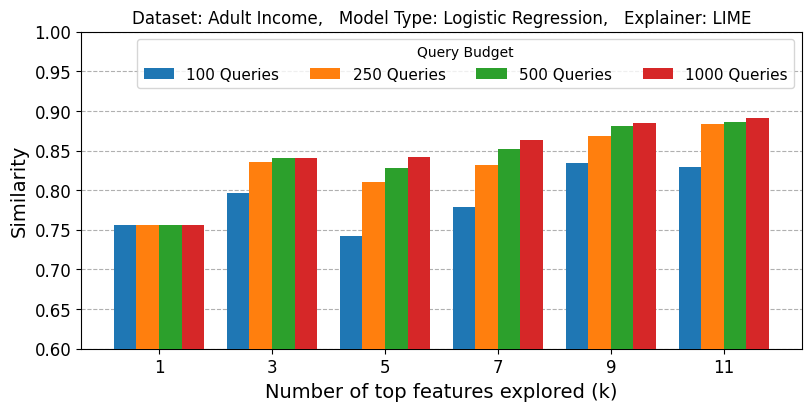

In [7]:
## Plotting is pain \_(-_-)_/ 

isSim = True
dataset_dict, model_dict, exp_dict = load_experiment_dicts()
k = len(nfe)
q = len(query_limit)

# Add as many data_s as the length of query_limit
data_s0, data_s1, data_s2, data_s3 = [], [], [], []

# Re-order the elements for bar plot (s0 means similarities for 100 queries)
for i in range(k):
    data_s0 += [rtest_sims[q*i]]
    data_s1 += [rtest_sims[q*i+1]]
    data_s2 += [rtest_sims[q*i+2]]
    data_s3 += [rtest_sims[q*i+3]]

# Round the values so that they seem prettier in barplot
data_s0 = list(np.around(np.array(np.mean(data_s0,axis=1)),4))
data_s1 = list(np.around(np.array(np.mean(data_s1,axis=1)),4))
data_s2 = list(np.around(np.array(np.mean(data_s2,axis=1)),4))
data_s3 = list(np.around(np.array(np.mean(data_s3,axis=1)),4))

isSim = True

n_features = ("1", "3", "5", "7", "9", "11")

d0 = {
    '100 Queries': data_s0,
    '250 Queries': data_s1,
    '500 Queries': data_s2,
    '1000 Queries': data_s3
}

x = np.arange(len(n_features))  # the label locations
width = 0.2
multiplier = 0

fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
plt.title('Dataset: '+dataset_dict.get(which_dataset)+
          ',   Model Type: '+model_dict.get(which_model)+
          ',   Explainer: '+exp_dict.get(explanation_tool), color='black')

for attribute, measurement in d0.items():
    offset = width * multiplier
    rects = ax.bar(x + offset-0.1, measurement, width, label=attribute, zorder=3)
    #ax.bar_label(rects, padding=10)
    multiplier += 1

ax.yaxis.grid(linestyle='--', zorder=0)
ax.set_xlabel('Number of top features explored (k)', fontsize=14)
ax.set_xticks(x + width, n_features)
ax.legend(title='Query Budget', loc='upper right', ncols=4, fontsize=11)
ax.set_ylabel('Similarity', fontsize=14)
ax.set_ylim(0.6, 1.0)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()